### Check Your System Support GPU Access

In [1]:
!nvidia-smi

Sun Nov 10 14:04:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650        Off |   00000000:01:00.0 Off |                  N/A |
| N/A   72C    P0             53W /   50W |     947MiB /   4096MiB |     88%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os 
curr_dir=os.getcwd()
print(curr_dir)

/home/naveen/Project/FootBallAi/notebook


### Import Libraries

In [3]:
from roboflow import Roboflow 
from IPython.display import Image 
from dotenv import load_dotenv


In [5]:
!mkdir {curr_dir}/datasets
%cd {curr_dir}/datasets

mkdir: cannot create directory ‘/home/navee/Project/FootballAI/training/datasets’: File exists
/home/navee/Project/FootballAI/training/datasets


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


### Pull The Dataset From Roboflow Universe

In [ ]:
load_dotenv()
ROBOFLOW_API_KEY = os.getenv('ROBOFLOW_API_KEY')

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("naveen-msvuf").project("football-players-detection-3zvbc-djhdu")
version = project.version(1)
dataset = version.download("yolov8")
                
                

loading Roboflow workspace...
loading Roboflow project...


In [6]:
yaml_dir=os.path.join(curr_dir,'datasets/football-players-detection-1/data.yaml')
with open(yaml_dir,'r')as file:
    read=file.read()
    print(read)

names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc-ziof6
  url: https://universe.roboflow.com/map-opolr/football-players-detection-3zvbc-ziof6/dataset/1
  version: 1
  workspace: map-opolr
test: test/images
train: ../train/images
val: ../valid/images



### This Two Lines Change the Yaml file:

#### Example :

Before Running the Commands:
```
train: /football-players-detection-10/train/images
val: /football-players-detection-10/val/images
```

After Running the Commands:
```
train: ../train/images
val: ../valid/images

```

In [7]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

sed: can't read {dataset.location}/data.yaml: No such file or directory
sed: can't read {dataset.location}/data.yaml: No such file or directory


In [8]:
yaml_dir=os.path.join(curr_dir,'datasets/football-players-detection-1/data.yaml')
with open(yaml_dir,'r')as file:
    read=file.read()
    print(read)

names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc-ziof6
  url: https://universe.roboflow.com/map-opolr/football-players-detection-3zvbc-ziof6/dataset/1
  version: 1
  workspace: map-opolr
test: test/images
train: ../train/images
val: ../valid/images



### Train the Model 
If you don't have a powerful GPU, train the model in Google Colab (recommended).

In [11]:
%cd {curr_dir}
! yolo task=detect mode=train model=yolov8n.pt data="/home/navee/Project/FootballAI/training/datasets/football-players-detection-1/data.yaml" batch=2 epochs=5 imgsz=1280 plots=True

/home/navee/Project/FootballAI/training
/home/navee/Project/FootballAI/_venv/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fea

### Output Plots and Images

In [13]:
!ls {curr_dir}/runs/detect/train/

args.yaml			 PR_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png  R_curve.png	   val_batch0_pred.jpg
confusion_matrix.png		 results.csv	   val_batch1_labels.jpg
F1_curve.png			 results.png	   val_batch1_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  val_batch2_labels.jpg
labels.jpg			 train_batch1.jpg  val_batch2_pred.jpg
P_curve.png			 train_batch2.jpg  weights


### Confusion Matrix

/home/navee/Project/FootballAI/ObjectDetectionForFootballAI


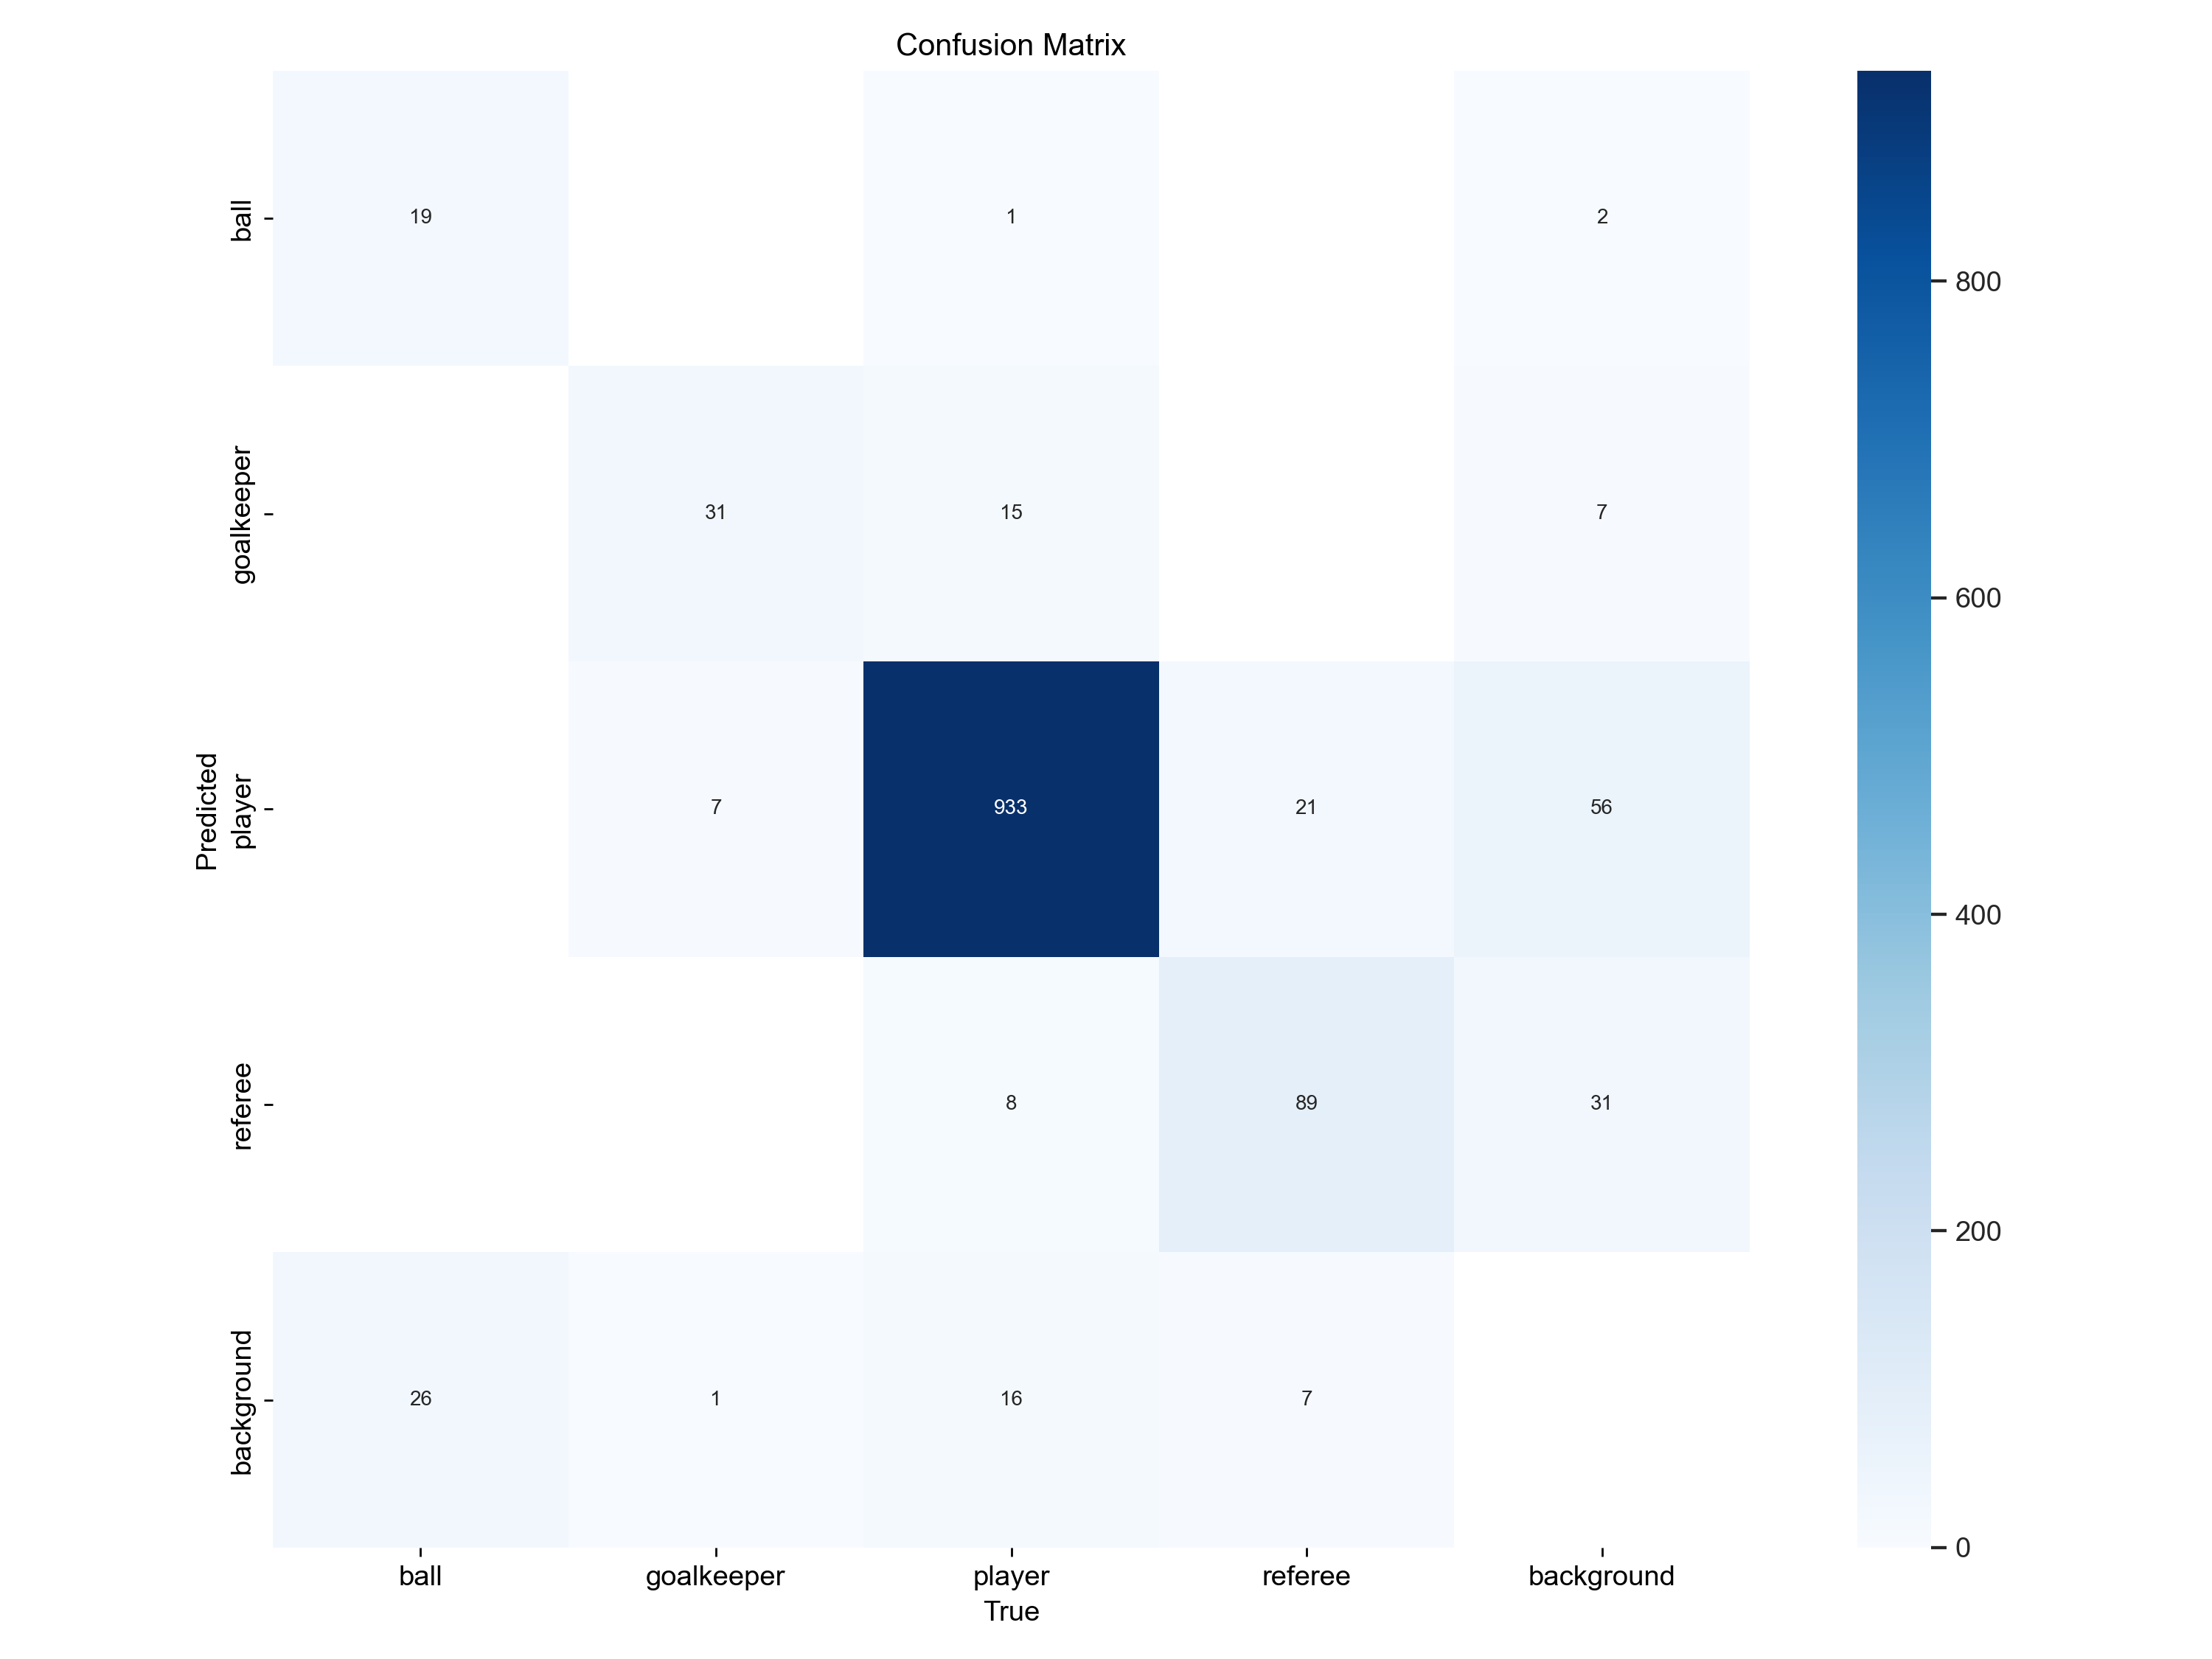

In [14]:
%cd {curr_dir}
Image(filename=f'{curr_dir}/runs/detect/train/confusion_matrix.png', width=600)

### Results Plot

/home/navee/Project/FootballAI/ObjectDetectionForFootballAI


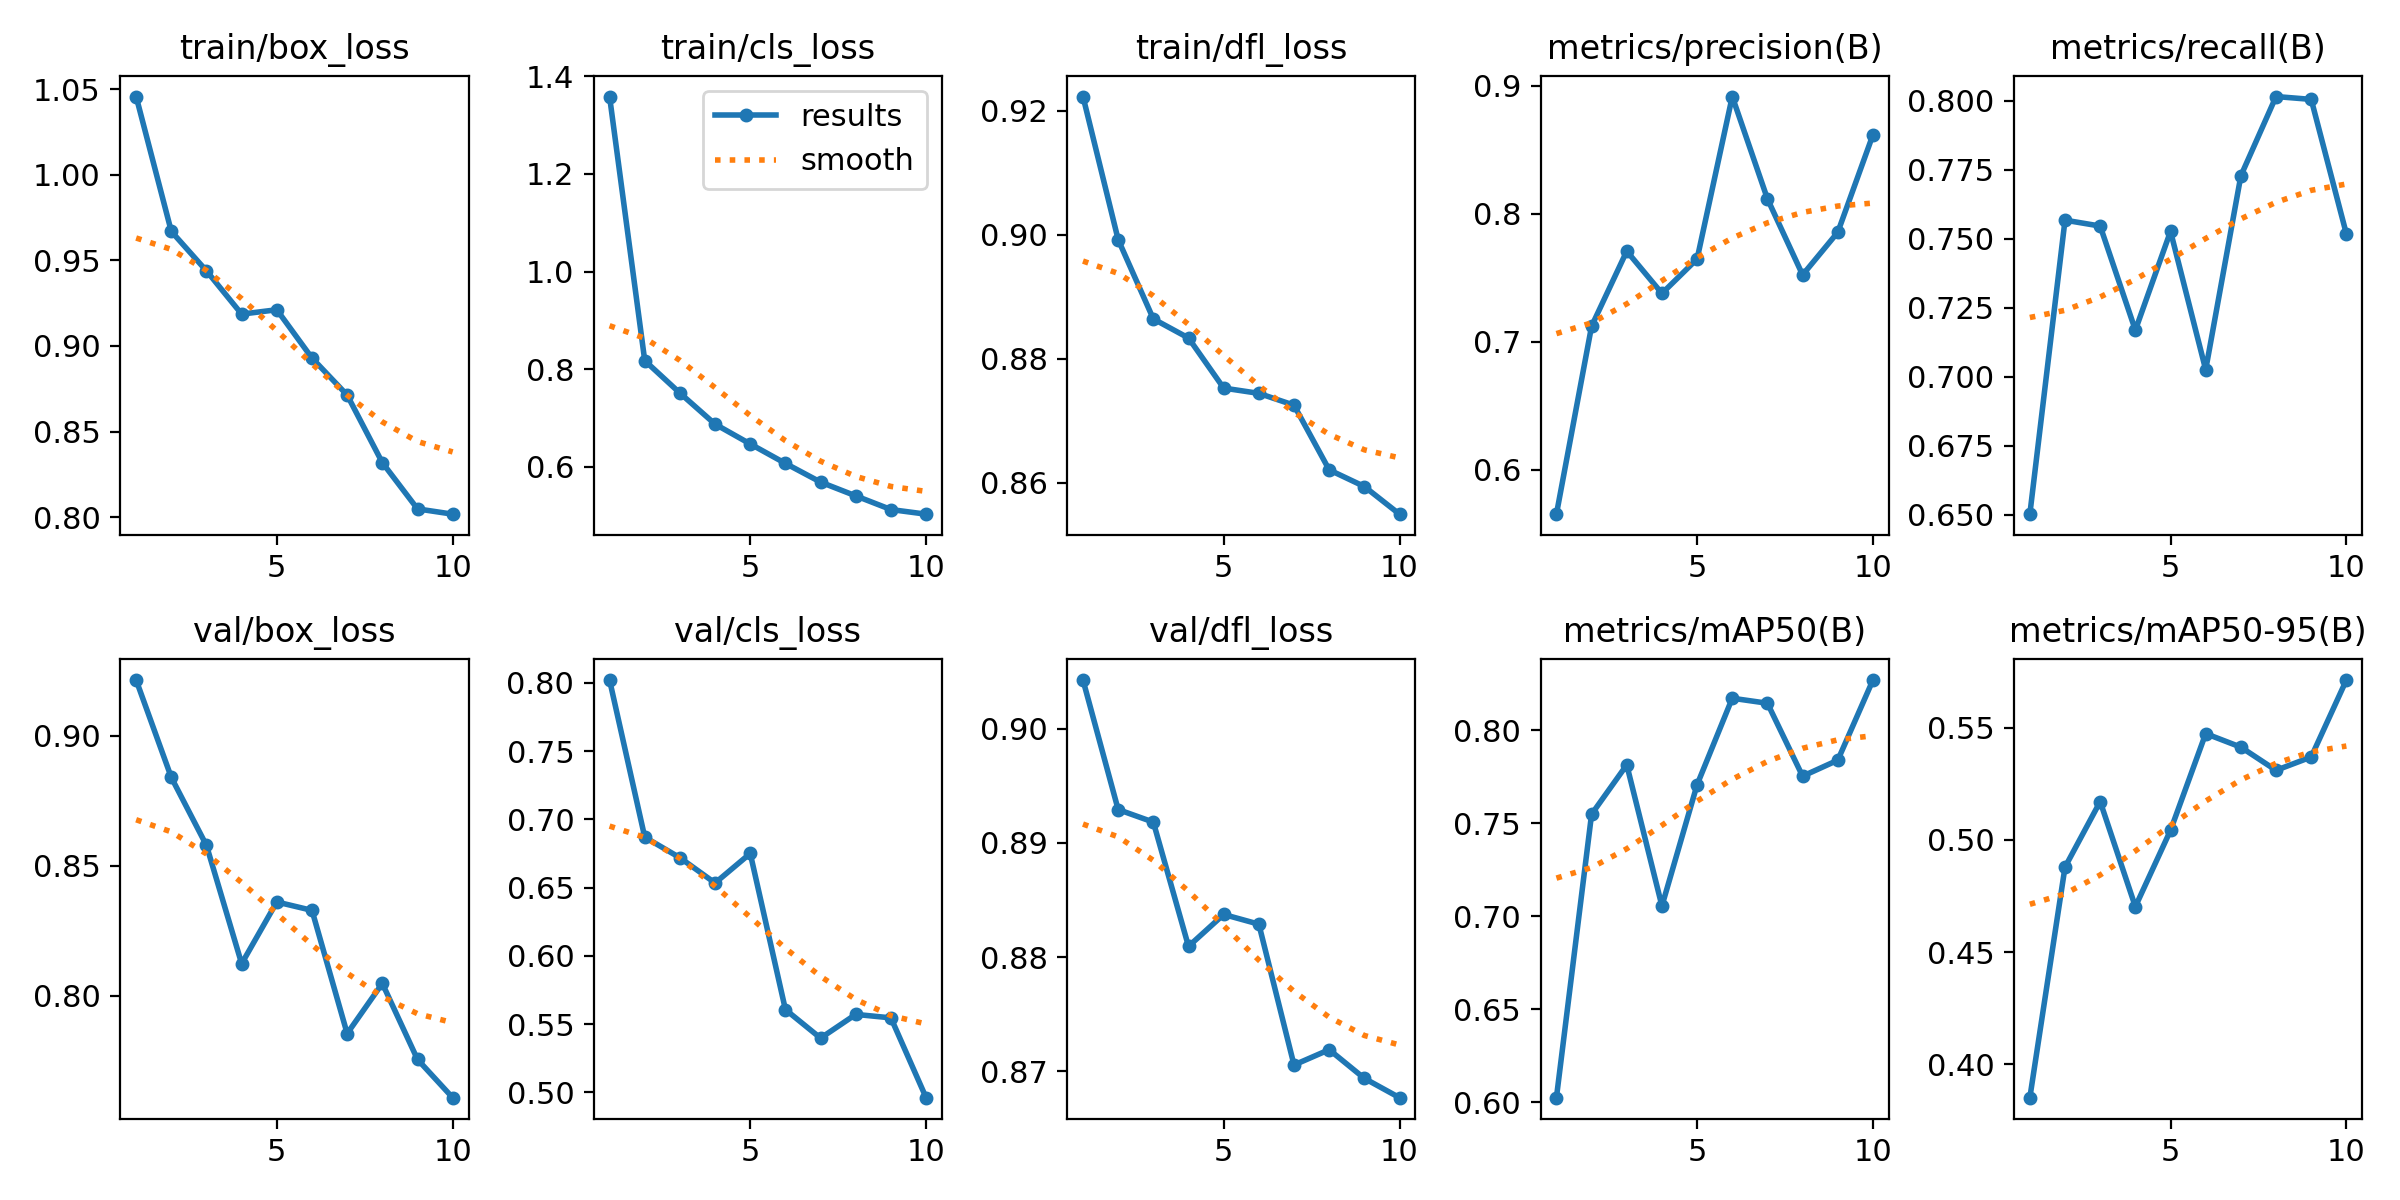

In [15]:
%cd {curr_dir}
Image(filename=f'{curr_dir}/runs/detect/train/results.png', width=600)

### Validation Batch 0 Predictions

/home/navee/Project/FootballAI/ObjectDetectionForFootballAI


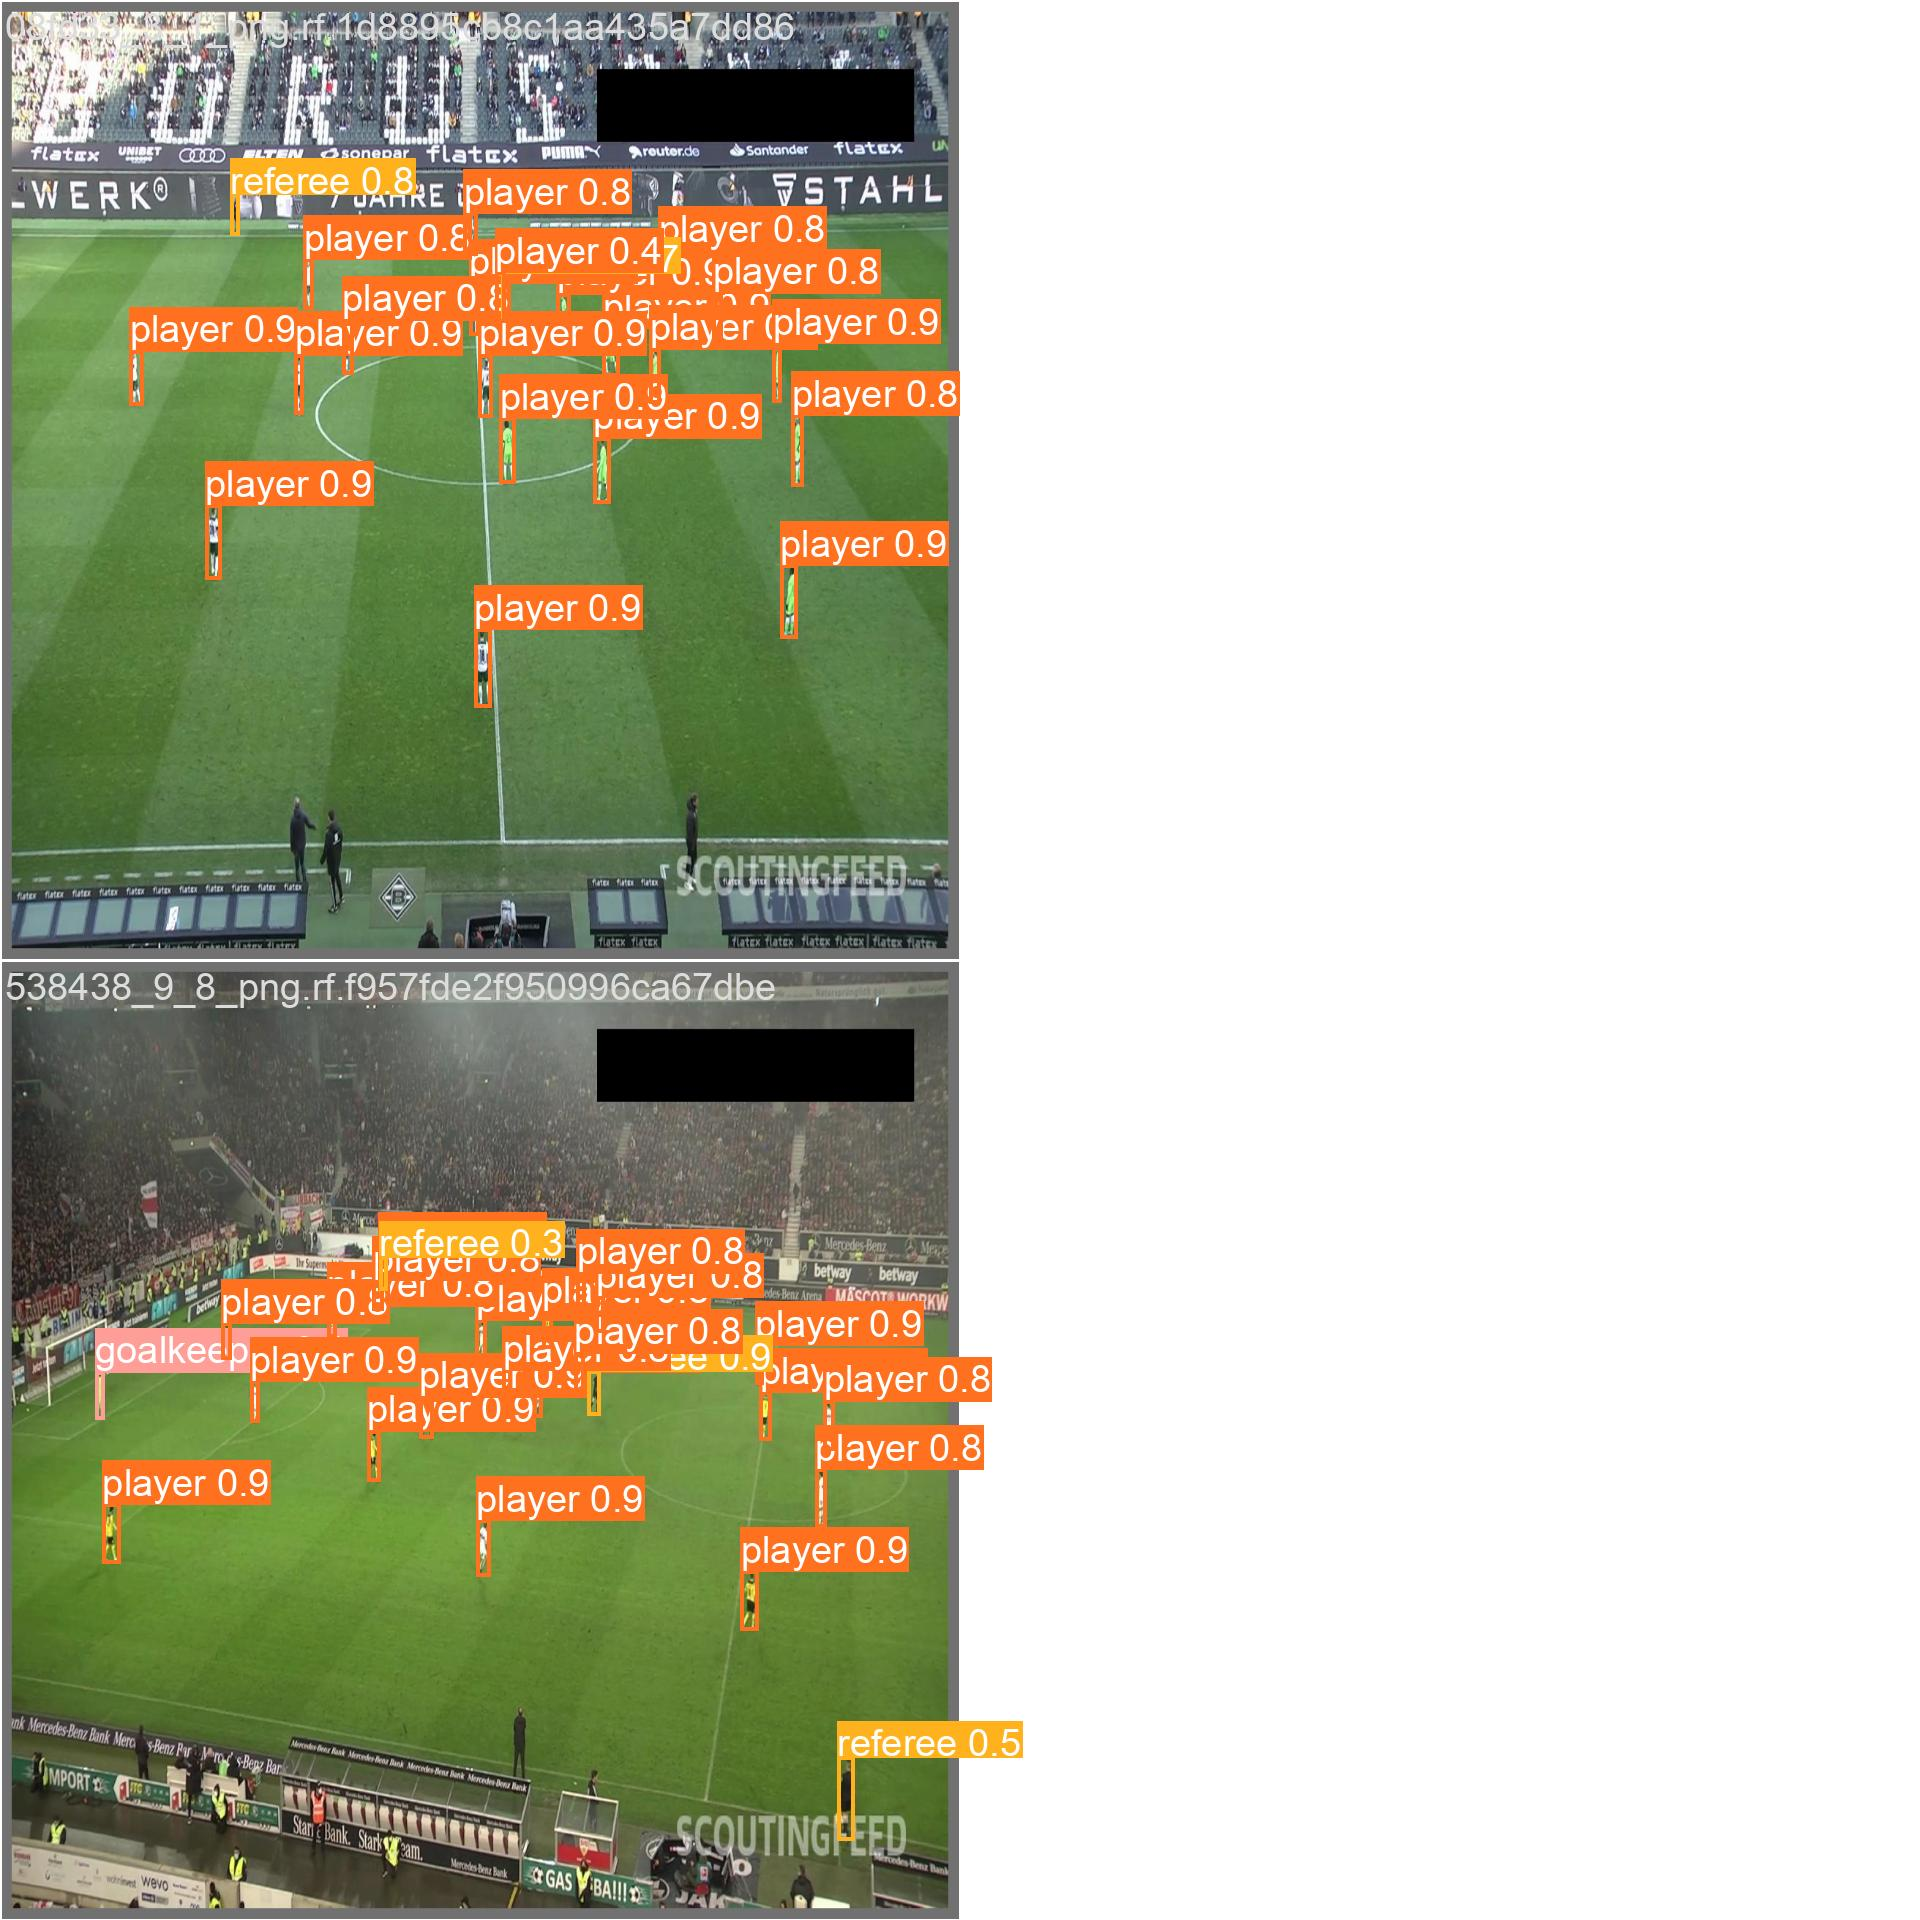

In [20]:
%cd {curr_dir}
Image(filename=f'{curr_dir}/runs/detect/train/val_batch0_pred.jpg', width=600)

### Validate Custom Model

In [21]:
%cd {curr_dir}

!yolo task=detect mode=val model={curr_dir}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml imgsz=1280

/home/navee/Project/FootballAI/ObjectDetectionForFootballAI
/home/navee/Project/FootballAI/_venv/lib/python3.10/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to t

### Deploy Model On Roboflow

In [18]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{curr_dir}/runs/detect/train/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


View the status of your deployment at: https://app.roboflow.com/map-opolr/football-players-detection-3zvbc-ziof6/1
Share your model with the world at: https://universe.roboflow.com/map-opolr/football-players-detection-3zvbc-ziof6/model/1
